In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import seaborn as sns

In [4]:
path='/home/local/heruhe/Desktop/Ga2o3/cascade/5type/1500ev/dump/pka4'
os.chdir(path)  
ws=pd.read_csv('ws', sep=' ')

columns=ws.columns[1:]
ws=ws.drop(columns=ws.columns[-1])
ws.columns=columns
ws.iloc[:]

,ClusterAnalysis.cluster_count,Timestep,WignerSeitz.interstitial_count
0,0,0,0
1,1,100,1
2,3,200,4
3,8,300,9
4,14,400,16
...,...,...,...
501,27,50100,27
502,28,50200,29
503,26,50300,27
504,27,50400,28


In [5]:
fn="lammps.stdout{}".format(30)
fn2='log.dat'
extract_data="gawk "+ "'$1=="+ '"ec"'+" {print $2,$3,$5,$6,$7,$8,$9,$10,$11}' " +fn+' > '+fn2
print(extract_data)

gawk '$1=="ec" {print $2,$3,$5,$6,$7,$8,$9,$10,$11}' lammps.stdout30 > log.dat


In [6]:
log= pd.read_csv('log.dat', sep=' ',header=None)
log.columns=['Timestep','t','T','pe','ke','Et','p','v','festop']


In [7]:
log=log[log['Timestep']%100==0]
log

,Timestep,t,T,pe,ke,Et,p,v,festop
0,0,0.000000,372.118098,-948838.1451,7695.958193,-941142.1869,815.814914,1773337.98,0.000000
10,100,0.007769,370.134640,-948839.6813,7654.937321,-941184.7440,690.180591,1773337.98,42.489700
20,200,0.017874,364.522122,-948771.3500,7538.862064,-941232.4880,650.748619,1773337.98,87.954206
30,300,0.031527,358.038097,-948689.8792,7404.762726,-941285.1165,750.846503,1773337.98,140.813382
40,400,0.047248,352.433001,-948623.5490,7288.840972,-941334.7080,929.741579,1773337.98,191.636042
...,...,...,...,...,...,...,...,...,...
5010,50100,49.609188,300.149891,-948715.5375,6207.548150,-942507.9894,134.920849,1773337.98,283.025178
5020,50200,49.709188,300.324749,-948730.9406,6211.164474,-942519.7762,82.004648,1773337.98,283.025178
5030,50300,49.809188,301.088291,-948758.7306,6226.955656,-942531.7749,84.759989,1773337.98,283.025178
5040,50400,49.909188,300.386524,-948738.9041,6212.442085,-942526.4621,-0.544745,1773337.98,283.025178


In [18]:
path='/home/local/heruhe/Desktop/Ga2o3/cascade/5type/1500ev/dump/pka1'
os.chdir(path)  
ws=pd.read_csv('ws', sep=' ')

columns=ws.columns[1:]
ws=ws.drop(columns=ws.columns[-1])
ws.columns=columns
log2= pd.read_csv('log.dat', sep=' ',header=None)
log2.columns=['Timestep','t','T','pe','ke','Et','p','v','festop']
log2=log2[log2['Timestep']%100==0]

(array([290., 300., 310., 320., 330., 340., 350., 360., 370., 380.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

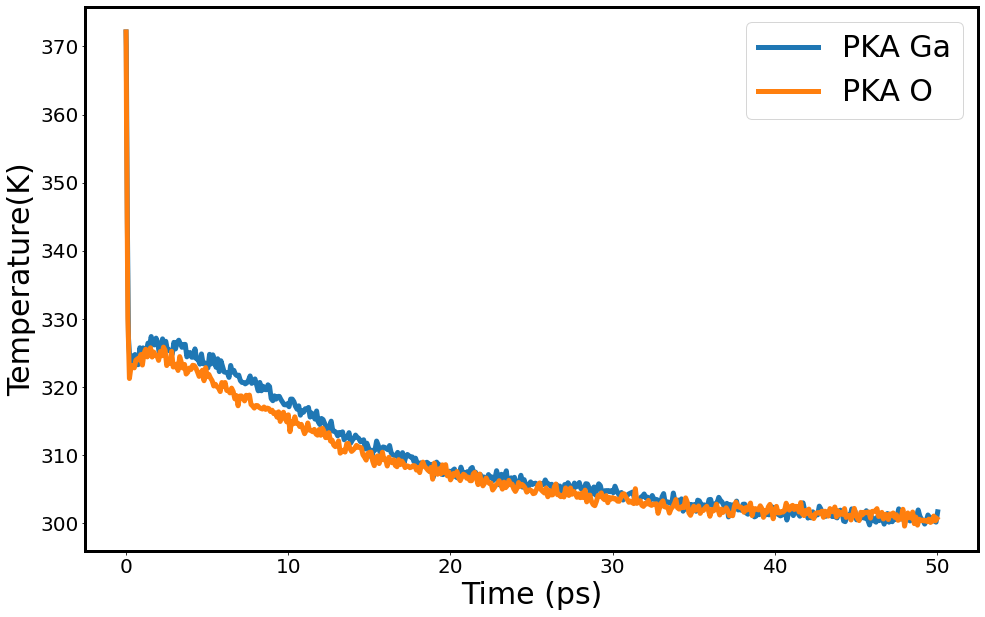

In [20]:
from matplotlib.font_manager import FontProperties
font = {'family' : 'Arial'}
plt.plot(log2['t'],log2['T'],linewidth=5, markersize=12,label='PKA Ga')
plt.plot(log['t'],log['T'],linewidth=5, markersize=12, label='PKA O')

plt.xlabel('Time (ps)',fontsize=30)
plt.ylabel('Temperature(K)',fontsize=30)
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.linewidth"] = 3
plt.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


(array([-942800., -942600., -942400., -942200., -942000., -941800.,
        -941600., -941400., -941200., -941000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

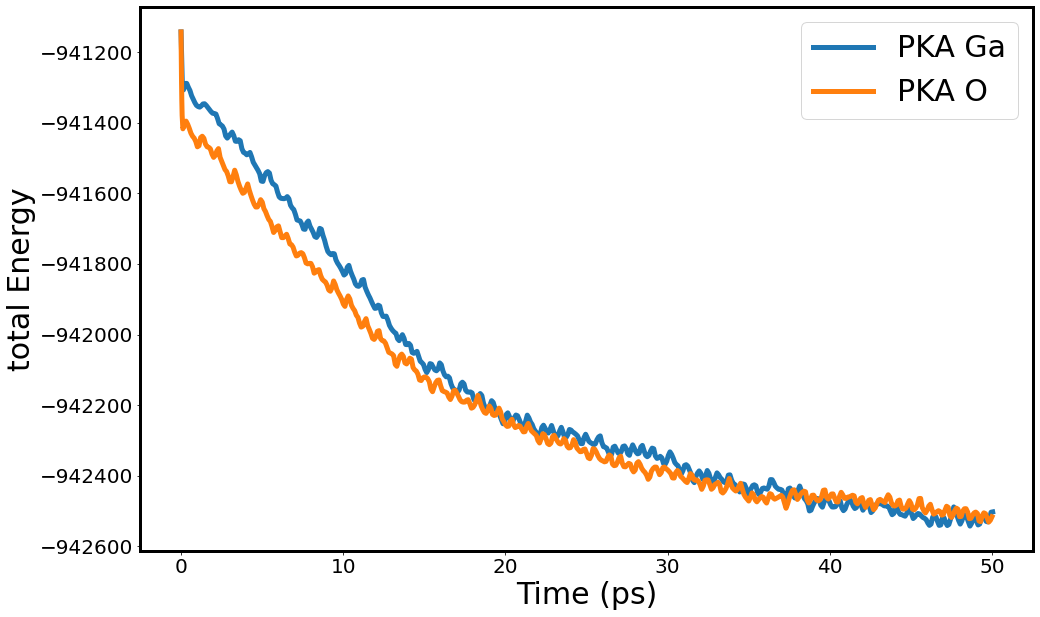

In [44]:
font = {'family' : 'Arial'}
plt.plot(log2['t'],log2['Et'],linewidth=5, markersize=12,label='PKA Ga')
plt.plot(log['t'],log['Et'],linewidth=5, markersize=12, label='PKA O')

plt.xlabel('Time (ps)',fontsize=30)
plt.ylabel('total Energy',fontsize=30)
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.linewidth"] = 3
plt.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

0     0.000000
10    0.016050
20    0.041023
30    0.080499
40    0.151641
50    0.251641
60    0.351641
70    0.451641
80    0.551641
90    0.651641
Name: t, dtype: float64 0      0
1      2
2     12
3     38
4    100
5    145
6    151
7    148
8    143
9    129
Name: WignerSeitz.interstitial_count, dtype: int64


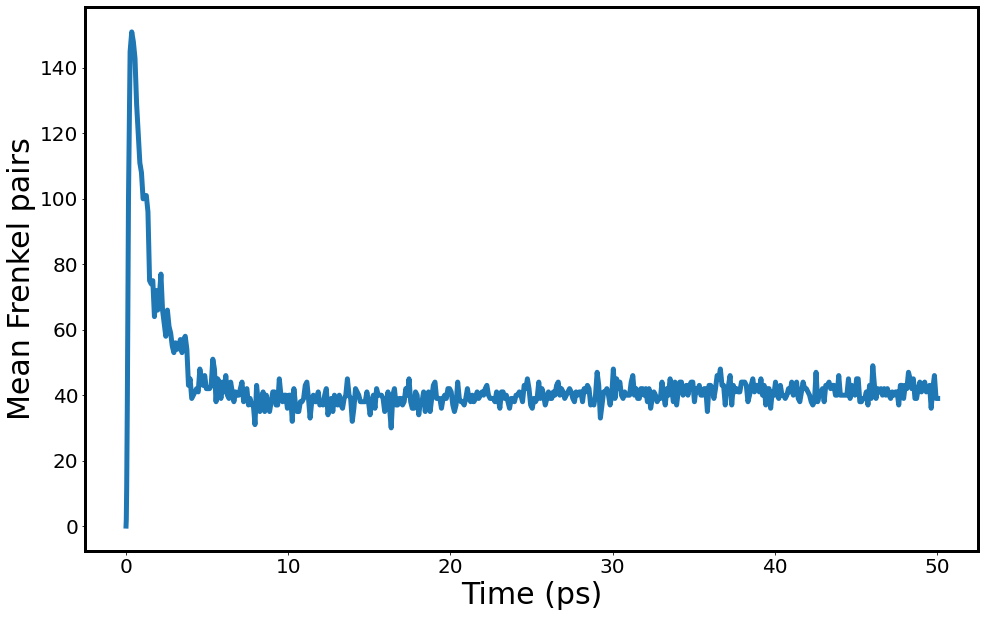

In [21]:
plt.plot(log2['t'],ws['WignerSeitz.interstitial_count'],linewidth=5, markersize=12)
print(log2['t'].head(10),ws['WignerSeitz.interstitial_count'].head(10))
plt.xlabel('Time (ps)',fontsize=30)
plt.ylabel('Mean Frenkel pairs',fontsize=30)
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.linewidth"] = 3
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('t_ws2.jpg')

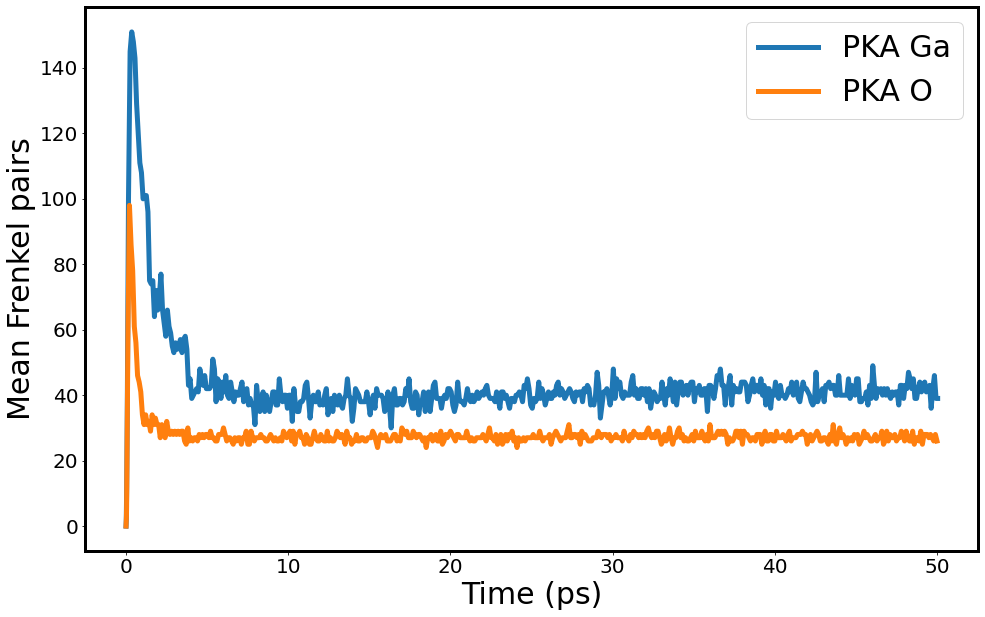

In [9]:
elements=['Ga','Ga','O','O','O']
for i in [1,3]:
    path='/home/local/heruhe/Desktop/Ga2o3/cascade/5type/1500ev/dump/pka{}'.format(i)
    os.chdir(path)  
    ws=pd.read_csv('ws', sep=' ')
    pka='PKA '+elements[i]
    columns=ws.columns[1:]
    ws=ws.drop(columns=ws.columns[-1])
    ws.columns=columns
    log= pd.read_csv('log.dat', sep=' ',header=None)
    log.columns=['Timestep','t','T','pe','ke','Et','p','v','festop']
    log=log[log['Timestep']%100==0]
    plt.plot(log['t'],ws['WignerSeitz.interstitial_count'],linewidth=5, markersize=12,label=pka)
plt.xlabel('Time (ps)',fontsize=30)
plt.ylabel('Mean Frenkel pairs',fontsize=30)
#plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.linewidth"] = 3
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.savefig('TOTAL_t_ws.jpg')
    
plt.rcParams["figure.figsize"] = (16,10)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

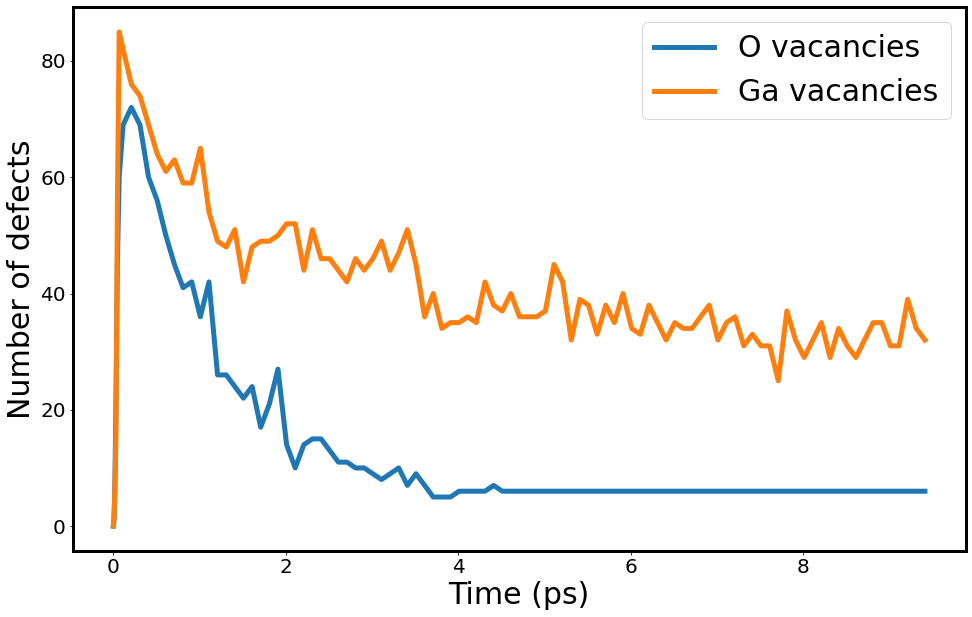

In [32]:
#pka type is Ga1
#Ga&O vancanies change with time
path='/home/local/heruhe/Desktop/Ga2o3/cascade/5type/1500ev/dump/pka1'
os.chdir(path)  
ws=pd.read_csv('vacancies.txt', sep=' ')
font = {'family' : 'Arial'}
plt.plot(log['t'][:100],ws.iloc[:,1][:100],linewidth=5, markersize=12,label='O vacancies')
plt.plot(log['t'][:100],ws.iloc[:,2][:100],linewidth=5, markersize=12, label='Ga vacancies')

plt.xlabel('Time (ps)',fontsize=30)
plt.ylabel('Number of defects',fontsize=30)
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.linewidth"] = 3
plt.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

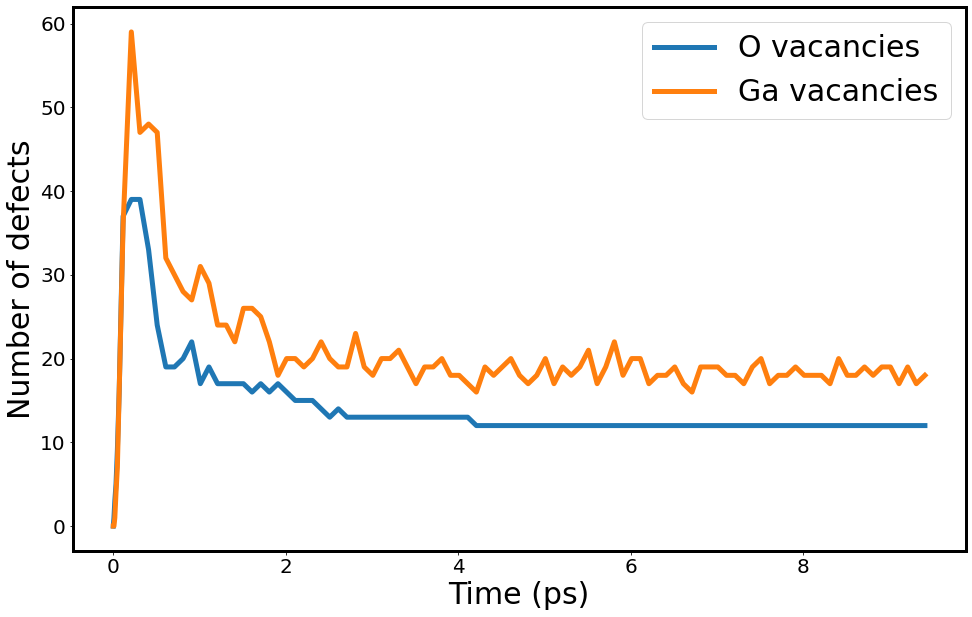

In [33]:
#pka type is O2
#Ga&O vancanies change with time
path='/home/local/heruhe/Desktop/Ga2o3/cascade/5type/1500ev/dump/pka4'
os.chdir(path) 
ws=pd.read_csv('vacancies.txt', sep=' ')
font = {'family' : 'Arial'}
plt.plot(log['t'][:100],ws.iloc[:,1][:100],linewidth=5, markersize=12,label='O vacancies')
plt.plot(log['t'][:100],ws.iloc[:,2][:100],linewidth=5, markersize=12, label='Ga vacancies')

plt.xlabel('Time (ps)',fontsize=30)
plt.ylabel('Number of defects',fontsize=30)
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.linewidth"] = 3
plt.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

20


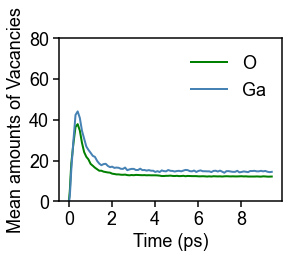

In [89]:
folder_path = '/home/ad/home/h/heruhe/ga2o3/cascade/1500ev/dump/O'  # Replace with the actual path to your folder
file_list = []
os.chdir(folder_path) 

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # Get all files in the folder
    file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
else:
    print(f"The folder path '{folder_path}' does not exist or is not a directory.")
print(len(file_list))
o_v=np.zeros((len(file_list),100))
ga_v=np.zeros((len(file_list),100))
o_r_o=np.zeros(len(file_list))
o_r_ga=np.zeros(len(file_list))
for i in range(len(file_list)):
    fn=file_list[i]
    ws=pd.read_csv(fn, sep=' ')
    o_v[i,:]=ws.iloc[:,1][:100]
    o_m=np.max(o_v[i,:])
    o_balance=o_v[i,-1]
    o_r_o[i]=(1-o_balance/o_m)*100
    ga_v[i,:]=ws.iloc[:,2][:100]
    ga_m=np.max(ga_v[i,:])
    ga_balance=ga_v[i,-1]
    o_r_ga[i]=(1-ga_balance/ga_m)*100
o_v_mean=np.mean(o_v, axis=0)
ga_v_mean=np.mean(ga_v, axis=0)
plt.plot(log['t'][:100],o_v_mean,linewidth=2, markersize=12,color='green',label='O')
plt.plot(log['t'][:100],ga_v_mean,linewidth=2, markersize=12,color='steelblue',label='Ga')
o_ga_v_max=np.max(ga_v_mean)
o_ga_v=ga_v_mean[-1]
o_o_v_max=np.max(o_v_mean)
o_o_v=o_v_mean[-1]
# Set figure size
plt.rcParams["figure.figsize"] = (4, 3)

# Set font family
plt.rcParams["font.family"] = "arial"


# Remove legend frame
plt.legend(fontsize=18, frameon=False)
plt.tick_params(axis='x', width=1.5,length=6,labelsize=18)
plt.tick_params(axis='y', width=1.5,length=6,labelsize=18)
# Show the plot
#plt.show()

plt.xlabel('Time (ps)',fontsize=18)
plt.ylabel('Mean amounts of Vacancies',fontsize=18)
plt.rcParams["axes.linewidth"] = 1.5
plt.ylim((0,80))
plt.xticks([0,2,4,6,8])
plt.savefig('/home/heruhe/Desktop/pkaodump', format='svg')

20


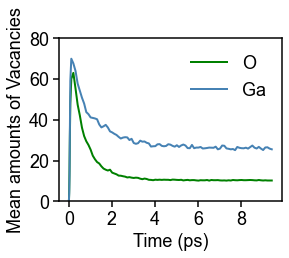

In [84]:
folder_path = '/home/ad/home/h/heruhe/ga2o3/cascade/1500ev/dump/Ga'  # Replace with the actual path to your folder
file_list = []
os.chdir(folder_path) 

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # Get all files in the folder
    file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
else:
    print(f"The folder path '{folder_path}' does not exist or is not a directory.")
print(len(file_list))
o_v=np.zeros((len(file_list),100))
ga_v=np.zeros((len(file_list),100))
ga_r_o=np.zeros(len(file_list))
ga_r_ga=np.zeros(len(file_list))
for i in range(len(file_list)):
    fn=file_list[i]
    ws=pd.read_csv(fn, sep=' ')
    o_v[i,:]=ws.iloc[:,1][:100]
    o_m=np.max(o_v[i,:])
    o_balance=o_v[i,-1]
    ga_r_o[i]=(1-o_balance/o_m)*100
    ga_v[i,:]=ws.iloc[:,2][:100]
    ga_m=np.max(ga_v[i,:])
    ga_balance=ga_v[i,-1]
    ga_r_ga[i]=(1-ga_balance/ga_m)*100
o_v_mean=np.mean(o_v, axis=0)


ga_v_mean=np.mean(ga_v, axis=0)

plt.plot(log['t'][:100],o_v_mean,linewidth=2,color='green',label='O')
plt.plot(log['t'][:100],ga_v_mean,linewidth=2,color='steelblue',label='Ga')
# Set figure size
plt.rcParams["figure.figsize"] = (4, 3)

# Set font family
plt.rcParams["font.family"] = "arial"


# Remove legend frame
plt.legend(fontsize=18, frameon=False)
plt.tick_params(axis='x', width=1.5,length=6,labelsize=18)
plt.tick_params(axis='y', width=1.5,length=6,labelsize=18)
# Show the plot
#plt.show()

plt.xlabel('Time (ps)',fontsize=18)
plt.ylabel('Mean amounts of Vacancies',fontsize=18)
plt.rcParams["axes.linewidth"] = 1.5
plt.ylim((0,80))
plt.xticks([0,2,4,6,8])
plt.savefig('/home/heruhe/Desktop/pkagadump', format='svg')

In [90]:
df = pd.DataFrame({
    'O': [np.mean(ga_r_o),np.mean(o_r_o)],
    'Ga': [np.mean(ga_r_ga),np.mean(o_r_ga)],
    'O_err': [np.std(ga_r_o)/np.sqrt(len(file_list )),np.std(o_r_o)/np.sqrt(len(file_list ))],  # Example values for O error bars
    'Ga_err': [np.std(ga_r_ga)/np.sqrt(len(file_list )),np.std(o_r_ga)/np.sqrt(len(file_list ))],  # Example values for Ga error bars
}, index=['PKA:Ga','PKA:O'])
df

,O,Ga,O_err,Ga_err
PKA:Ga,83.684425,66.186694,1.289114,1.623786
PKA:O,71.785526,72.630926,1.422069,2.011329


In [103]:
print(np.mean(ga_r_o),np.mean(ga_r_ga))
print(np.mean(o_r_o),np.mean(o_r_ga))

83.68442501354221 66.18669413438276
71.78552590035147 72.6309259097417


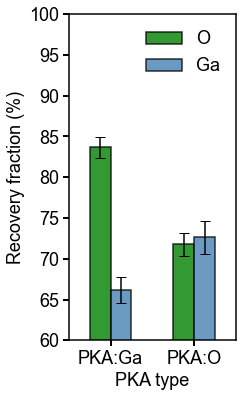

In [112]:
total_m=df[['O','Ga']]
total_err=df[['O_err','Ga_err']]
total_err = total_err.rename(columns={ 'O_err': 'O', 'Ga_err': 'Ga'})
# Define colors for each bar
bar_colors = [ 'green', 'steelblue']
total_m.plot(kind='bar', yerr=total_err, rot=0, alpha=0.8,edgecolor='black', linewidth=1.5, fontsize=18, capsize=10, error_kw={'capsize': 5},color=bar_colors)

plt.xlabel('PKA type', fontsize=18)
plt.ylabel('Recovery fraction (%)', fontsize=18)

# Set figure size
plt.rcParams["figure.figsize"] = (3, 6)

# Set font family
plt.rcParams["font.family"] = "arial"

# Change the figure frame (border) line width
plt.rcParams['axes.linewidth'] = 1.5

# Remove legend frame
plt.legend(fontsize=18, frameon=False)
plt.tick_params(axis='x', width=2,length=6,labelsize=18)
plt.tick_params(axis='y', width=2,length=6,labelsize=18)
# Show the plot
#plt.show()
plt.ylim(60, 100)
plt.savefig('/home/heruhe/Desktop/defect_recover_dump', format='svg')